# AlexNet Attempt

## Data Loading

In [1]:
import os
import torch
from helper import *

In [2]:
data_dir = "dataset"
print(os.listdir(data_dir))

['cataract', 'glaucoma', '.DS_Store', 'diabetic_retinopathy', 'normal']


In [3]:
from os import walk
for (dirpath, dirnames, filenames) in walk(data_dir):
    print("Directory path: ", dirpath)
    print("Folder name: ", dirnames)
#     print("File name: ", filenames)

Directory path:  dataset
Folder name:  ['cataract', 'glaucoma', 'diabetic_retinopathy', 'normal']
Directory path:  dataset/cataract
Folder name:  []
Directory path:  dataset/glaucoma
Folder name:  []
Directory path:  dataset/diabetic_retinopathy
Folder name:  []
Directory path:  dataset/normal
Folder name:  []


Define transform

Set params

In [4]:
img_size = 227
BATCH_SIZE = 1

In [5]:
from torchvision import transforms

def transform(image_size:int):
    # transform = torch.nn.Sequential(transforms.Resize(255),
    #                              transforms.CenterCrop(image_size),
    #                              transforms.PILToTensor())
    transform = transforms.Compose([transforms.Resize(image_size),
                                 transforms.CenterCrop(image_size),
                                 transforms.ToTensor()])
    return transform

In [6]:
from torchvision import datasets
dataset = datasets.ImageFolder(data_dir, transform=transform(img_size))
dataset.class_to_idx

{'cataract': 0, 'diabetic_retinopathy': 1, 'glaucoma': 2, 'normal': 3}

In [7]:
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [0.8, 0.2])

In [8]:
#dataloader = torch.utils.data.DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=True)

<Axes: >

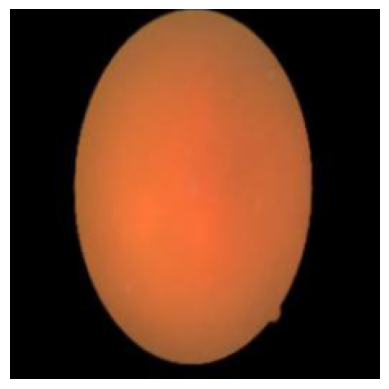

In [9]:
# Run this to test your data loader
images, labels = next(iter(train_loader))
# helper.imshow(images[0], normalize=False)
imshow(images[0], normalize=False)

## AlexNet Training

In [10]:
from heading import *

In [11]:
input_channels = 3
output_size = 4

In [12]:
Alex_net = AlexNet(input_channels, output_size)

In [13]:
alex_net = create_network(Alex_net)

In [14]:
EPOCH = 1
LR = 0.001
number_of_images = 100

In [15]:
trained_alexnet_model = train_model(alex_net, train_loader, LR, EPOCH, number_of_images)

[1,100] loss:1.441
Current Loss 1.500436782836914


In [16]:
test_model(trained_alexnet_model, test_loader, number_of_images = 10)

0
1
2
3
4
5
6
7
8
9
10
correct1:  2
Test acc: 0.18181818181818182


In [17]:
#predict_image(trained_alexnet_model, select_image, label_list)

NameError: name 'select_image' is not defined

In [ ]:
torch.save(trained_alexnet_model, 'AlexNet_model.pth')

## AlexNet Retraining

In [21]:
# pt_alexnet_model = torch.hub.load('pytorch/vision:v0.10.0', 'alexnet', pretrained=True)
# pt_alexnet_model.eval()


Using cache found in /Users/michiea/.cache/torch/hub/pytorch_vision_v0.10.0
/opt/anaconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /Users/michiea/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:40<00:00, 6.08MB/s] 


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
pre_trained_alexnet_model = train_model(pretrained_alexnet_model, train_loader, LR, EPOCH, number_of_images)

In [ ]:
test_model(re_trained_alexnet_model, test_loader, number_of_images = 10)

### Alexnet Retraining 2

In [24]:
pt_alexnet_model = torchvision.models.alexnet(weights='IMAGENET1K_V1')

In [27]:
num_features = pt_alexnet_model.fc.in_features

pt_alexnet_model.fc = nn.Linear(num_features, 4)

pt_alexnet_model = pt_alexnet_model.to(device)

criterion = nn.CrossEntropyLoss()

optimizer_ft = optim.SGD(pt_alexnet_model.parameters(), lr=0.001, momentum=0.9)

#exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

AttributeError: 'AlexNet' object has no attribute 'fc'

In [ ]:
#model_ft = train_model(pt_alexnet_model, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=25)

In [ ]:
re_trained_alexnet_model = train_model(pretrained_alexnet_model, train_loader, LR, EPOCH, number_of_images)

In [ ]:
test_model(re_trained_alexnet_model, test_loader, number_of_images = 10)